### STEP1: Generate COCO Style Annotation

Here we show a basic usage example using DemoDataset in `data/DemoDataset/`

In [ ]:
!python ./coco_style_annotation_creator/test_human2coco_format.py \
--dataset 'Demo' \
--json_save_dir './data/DemoDataset/msrcnn_finetune_annotations' \
--test_img_dir './data/DemoDataset/global_pic'

### STEP2: Generater Instance Prediciton
Here we provide a finetuned ResNet152 model on CIHP dataset with human instance mask. Download the pretrained weight in `pretrain_model/`.

- [detectron2_maskrcnn_cihp_finetune.pth](https://drive.google.com/file/d/1T797HPC9V1mmw0cDoVOPSF1F_rrTcGPG/view?usp=sharing)


In [ ]:
cd ./detectron2/tools/

In [ ]:
!python finetune_net.py \
--num-gpus 1 \
--config-file ../configs/Misc/demo.yaml \
--eval-only MODEL.WEIGHTS ../../pretrain_model/detectron2_maskrcnn_cihp_finetune.pth TEST.AUG.ENABLED False DATALOADER.NUM_WORKERS 0

Crop the original image by prediction bbox

In [ ]:
cd ../../

In [ ]:
!python make_crop_and_mask_w_mask_nms.py \
--img_dir './data/DemoDataset/global_pic' \ 
--save_dir './data/DemoDataset' \
--img_list './data/DemoDataset/annotations/Demo.json' \
--det_res './data/DemoDataset/detectron2_prediction/inference/instances_predictions.pth'

### STEP3: Predict Local and Global Result
Download the pretrained weight in `pretrain_model/`.

- [exp_schp_multi_cihp_global.pth](https://drive.google.com/file/d/1s30hj8zeYj0wuTA5Rek-one-v5uT7kX9/view?usp=sharing)
- [exp_schp_multi_cihp_local.pth](https://drive.google.com/file/d/1dwDrXHkhAe_nYtnSqi548zrjo5mlSPF0/view?usp=sharing)

In [1]:
cd ../

/home/peike/Projects/Augmented-CE2P


In [ ]:
!export PYTHONPATH=./:$PYTHONPATH

In [ ]:
!python mhp_extension/global_local_parsing/global_local_evaluate.py \
--data-dir mhp_extension/data/DemoDataset \
--split-name crop_pic \
--model-restore mhp_extension/pretrain_model/exp_schp_multi_cihp_local.pth \
--log-dir mhp_extension/data/DemoDataset \
--save-results

In [ ]:
!python mhp_extension/global_local_parsing/global_local_evaluate.py \
--data-dir mhp_extension/data/DemoDataset \
--split-name global_pic \
--model-restore mhp_extension/pretrain_model/exp_schp_multi_cihp_global.pth \
--log-dir mhp_extension/data/DemoDataset \
--save-results

### STEP4: Fusion Prediciton

In [ ]:
!python mhp_extension/logits_fusion.py \
--test_json_path ./mhp_extension/data/DemoDataset/crop.json \
--global_output_dir ./mhp_extension/data/DemoDataset/global_pic_parsing \
--msrcnn_output_dir ./mhp_extension/data/DemoDataset/crop_pic_parsing \
--gt_output_dir ./mhp_extension/data/DemoDataset/crop_pic_parsing \
--mask_output_dir ./mhp_extension/data/DemoDataset/crop_mask \
--save_dir ./mhp_extension/data/DemoDataset/mhp_fusion_parsing \

### Visualization

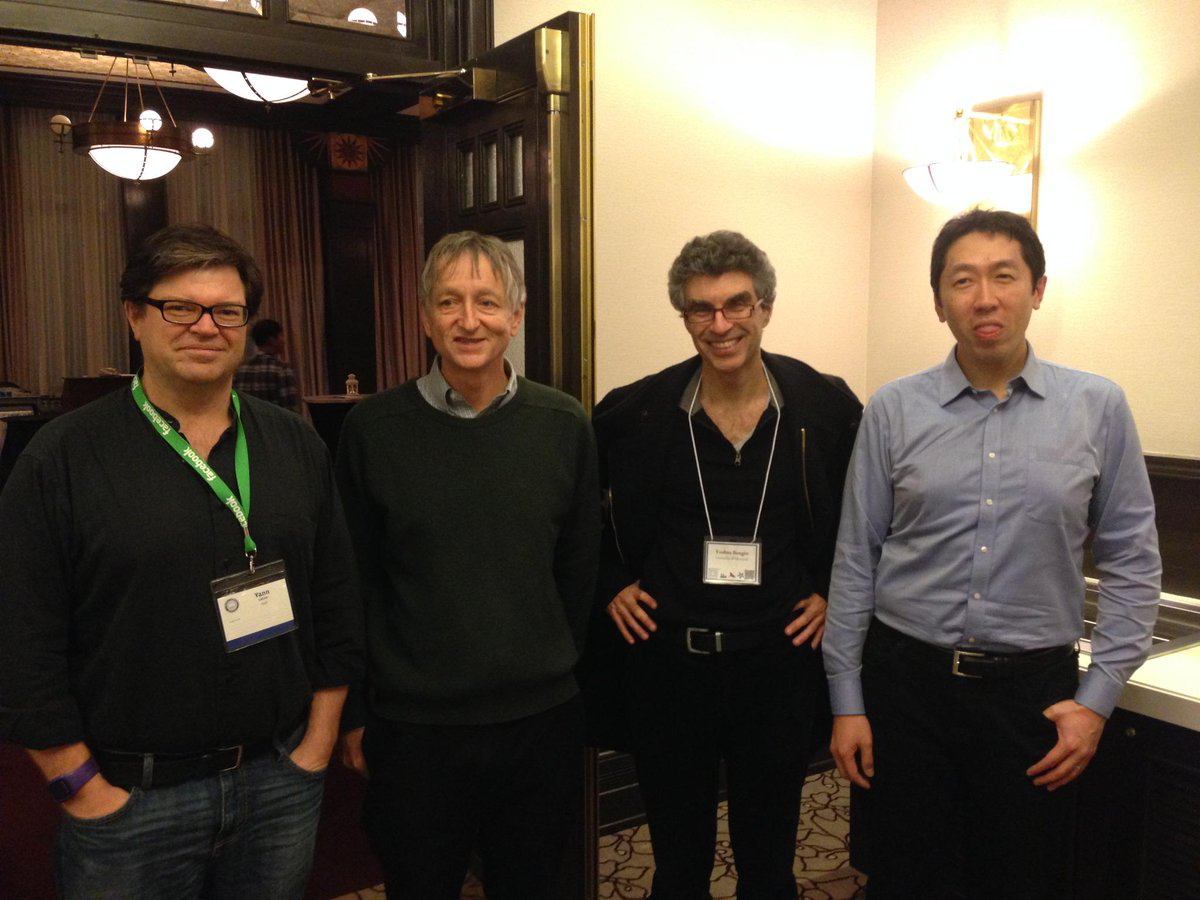

In [2]:
from PIL import Image
Image.open('./mhp_extension/demo/demo.jpg')

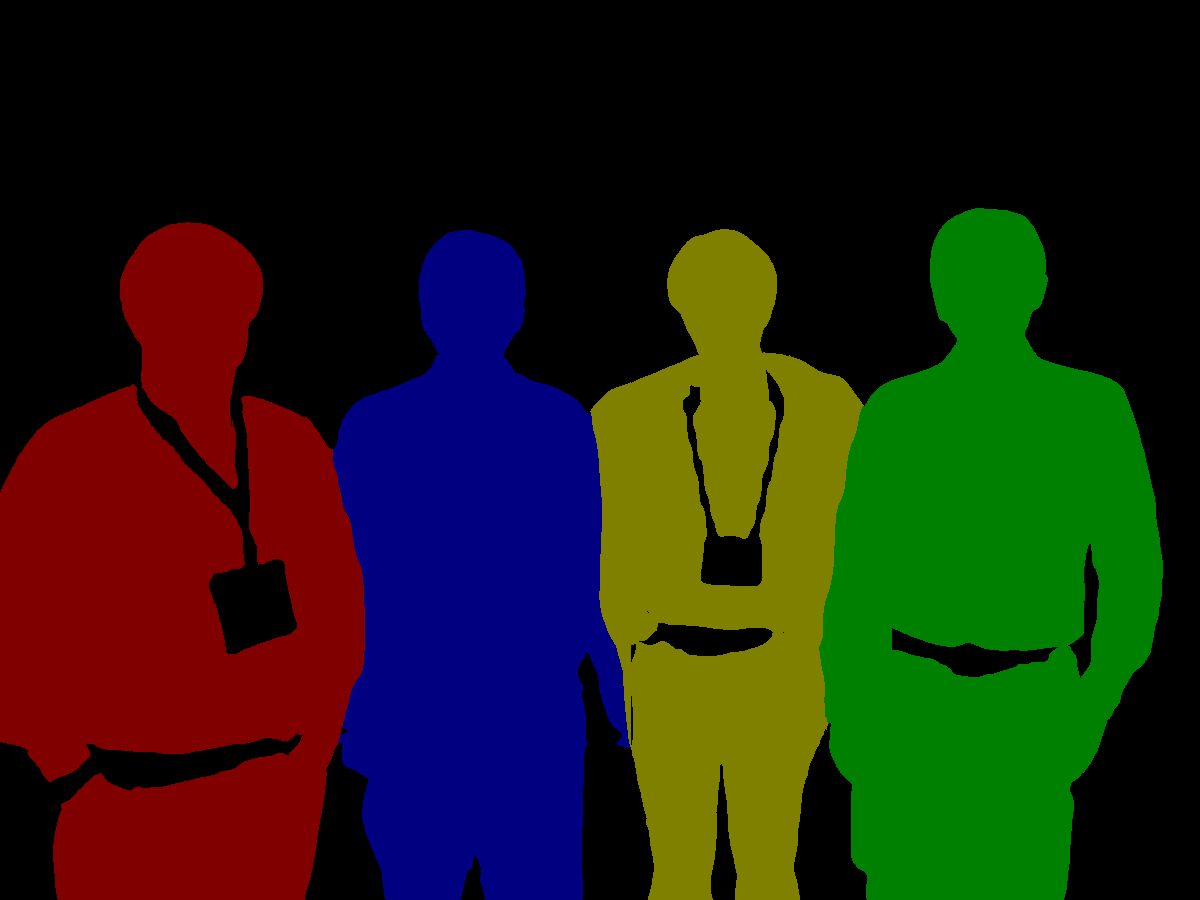

In [3]:
Image.open('./mhp_extension/demo/demo_instance_human_mask.png')

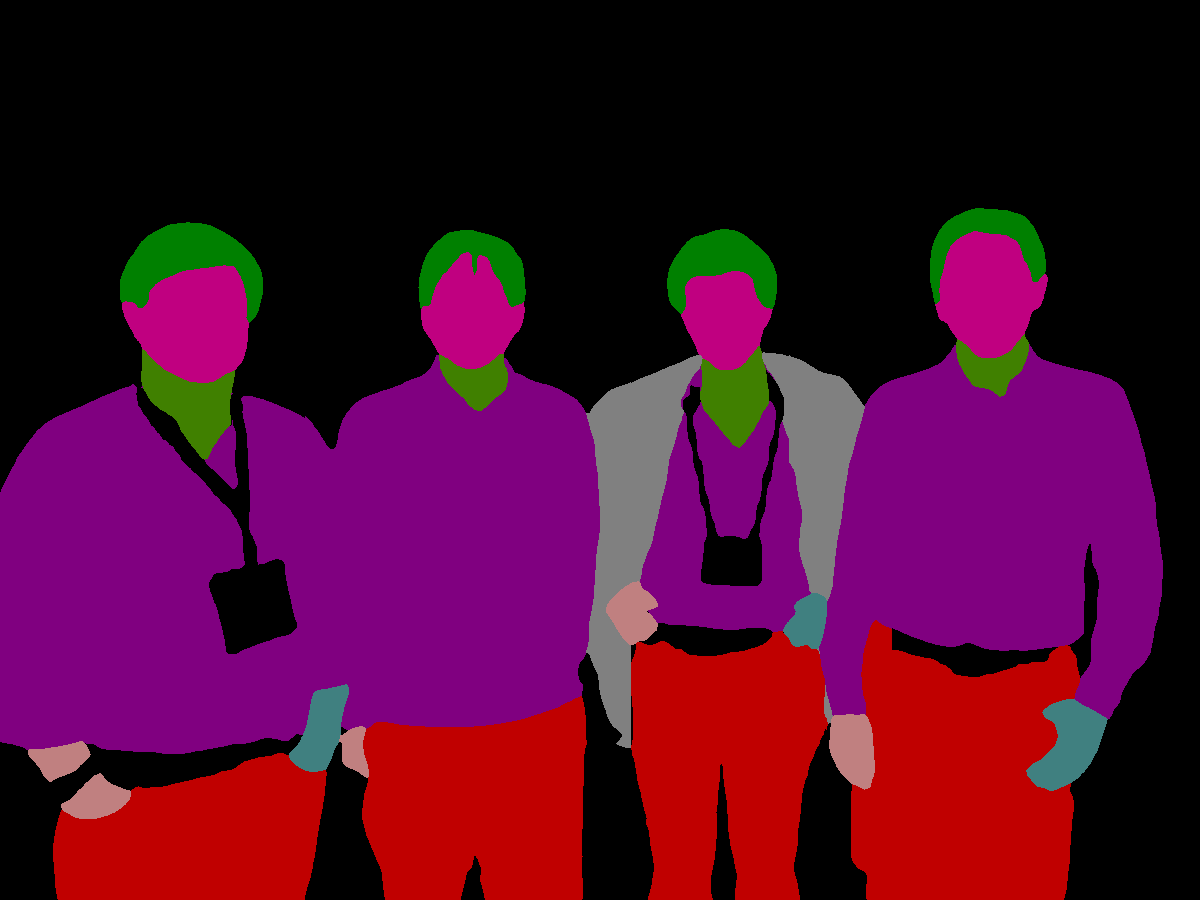

In [4]:
Image.open('./mhp_extension/demo/demo_global_human_parsing.png')

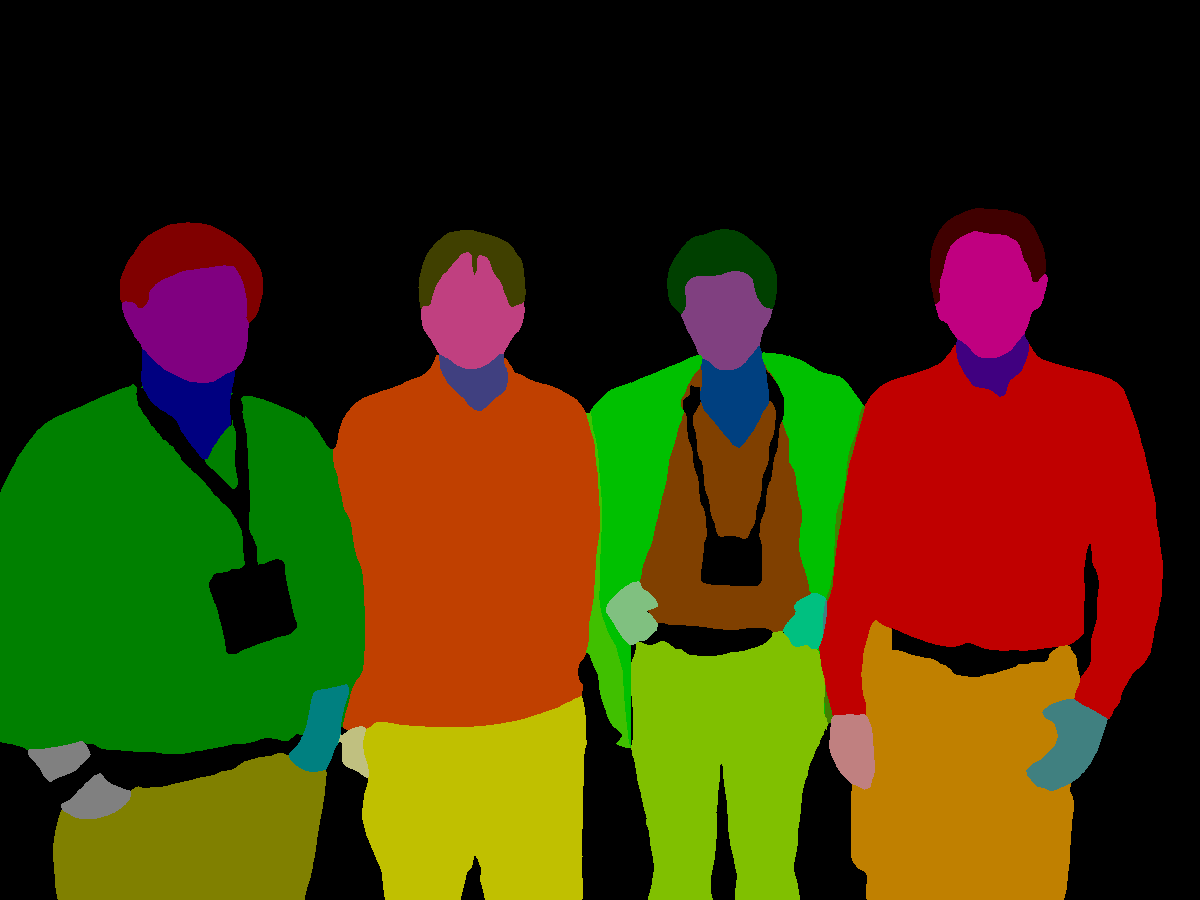

In [5]:
Image.open('./mhp_extension/demo/demo_multiple_human_parsing.png')